# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
from sklearn import datasets


data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])

y = pd.Series(data["target"])

X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#KMeans con 8 clusters
kmeans_model = KMeans(n_clusters=8, random_state=42)

# Entrena el modelo 
kmeans_model.fit(X)


labels = kmeans_model.labels_


silhouette_avg = silhouette_score(X, labels)

print(f"La puntuación de silueta para el modelo KMeans es: {silhouette_avg}")


La puntuación de silueta para el modelo KMeans es: 0.5398971441034115


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [7]:
#KMeans con 5 clusters
kmeans_model = KMeans(n_clusters=5, random_state=42)

# Entrena el modelo con los datos X
kmeans_model.fit(X)

# Obtiene las etiquetas de los clusters para cada muestra en X
labels = kmeans_model.labels_


silhouette_avg = silhouette_score(X, labels)

print(f"La puntuación de silueta para el modelo KMeans es: {silhouette_avg}")


La puntuación de silueta para el modelo KMeans es: 0.5489993239795675


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [8]:
# Crea una instancia de KMeans con 3 clusters
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Entrena el modelo 
kmeans_model.fit(X)

# Obtiene las etiquetas 
labels = kmeans_model.labels_


silhouette_avg = silhouette_score(X, labels)

print(f"La puntuación de silueta para el modelo KMeans es: {silhouette_avg}")


La puntuación de silueta para el modelo KMeans es: 0.5711381937868838


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

     ------------------------------------ 282.6/282.6 kB 645.4 kB/s eta 0:00:00


C:\Users\usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


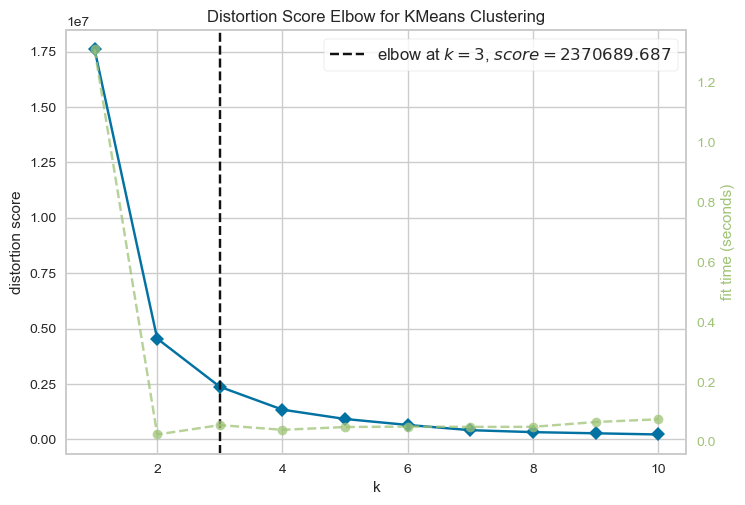

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
%pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer

# Crea una instancia de KMeans
kmeans_model = KMeans(random_state=42)


elbow_visualizer = KElbowVisualizer(kmeans_model, k=(1, 11), metric='distortion')

# Entrena el modelo
elbow_visualizer.fit(X)

# Visualiza la curva del codo
elbow_visualizer.show()


## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

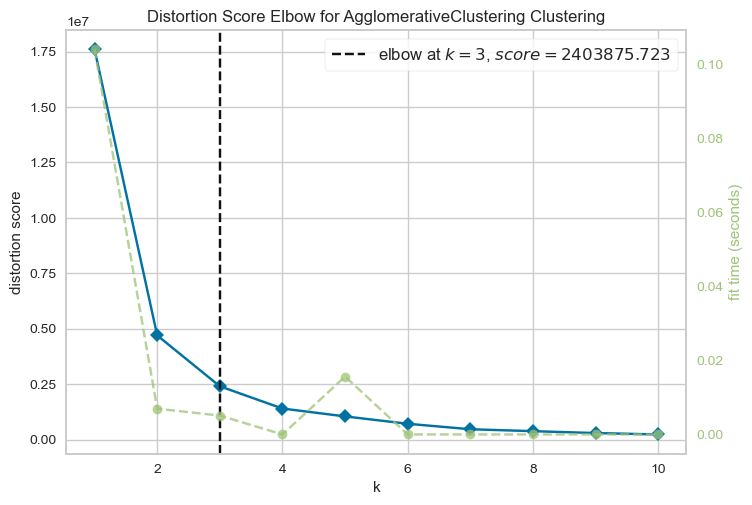

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer


agg_model = AgglomerativeClustering()

# Crea una visualización de la curva del codo con la métrica de distorsión
elbow_visualizer = KElbowVisualizer(agg_model, k=(1, 11), metric='distortion')

# Entrena el modelo con los datos X
elbow_visualizer.fit(X)

# Visualiza la curva del codo
elbow_visualizer.show()


## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

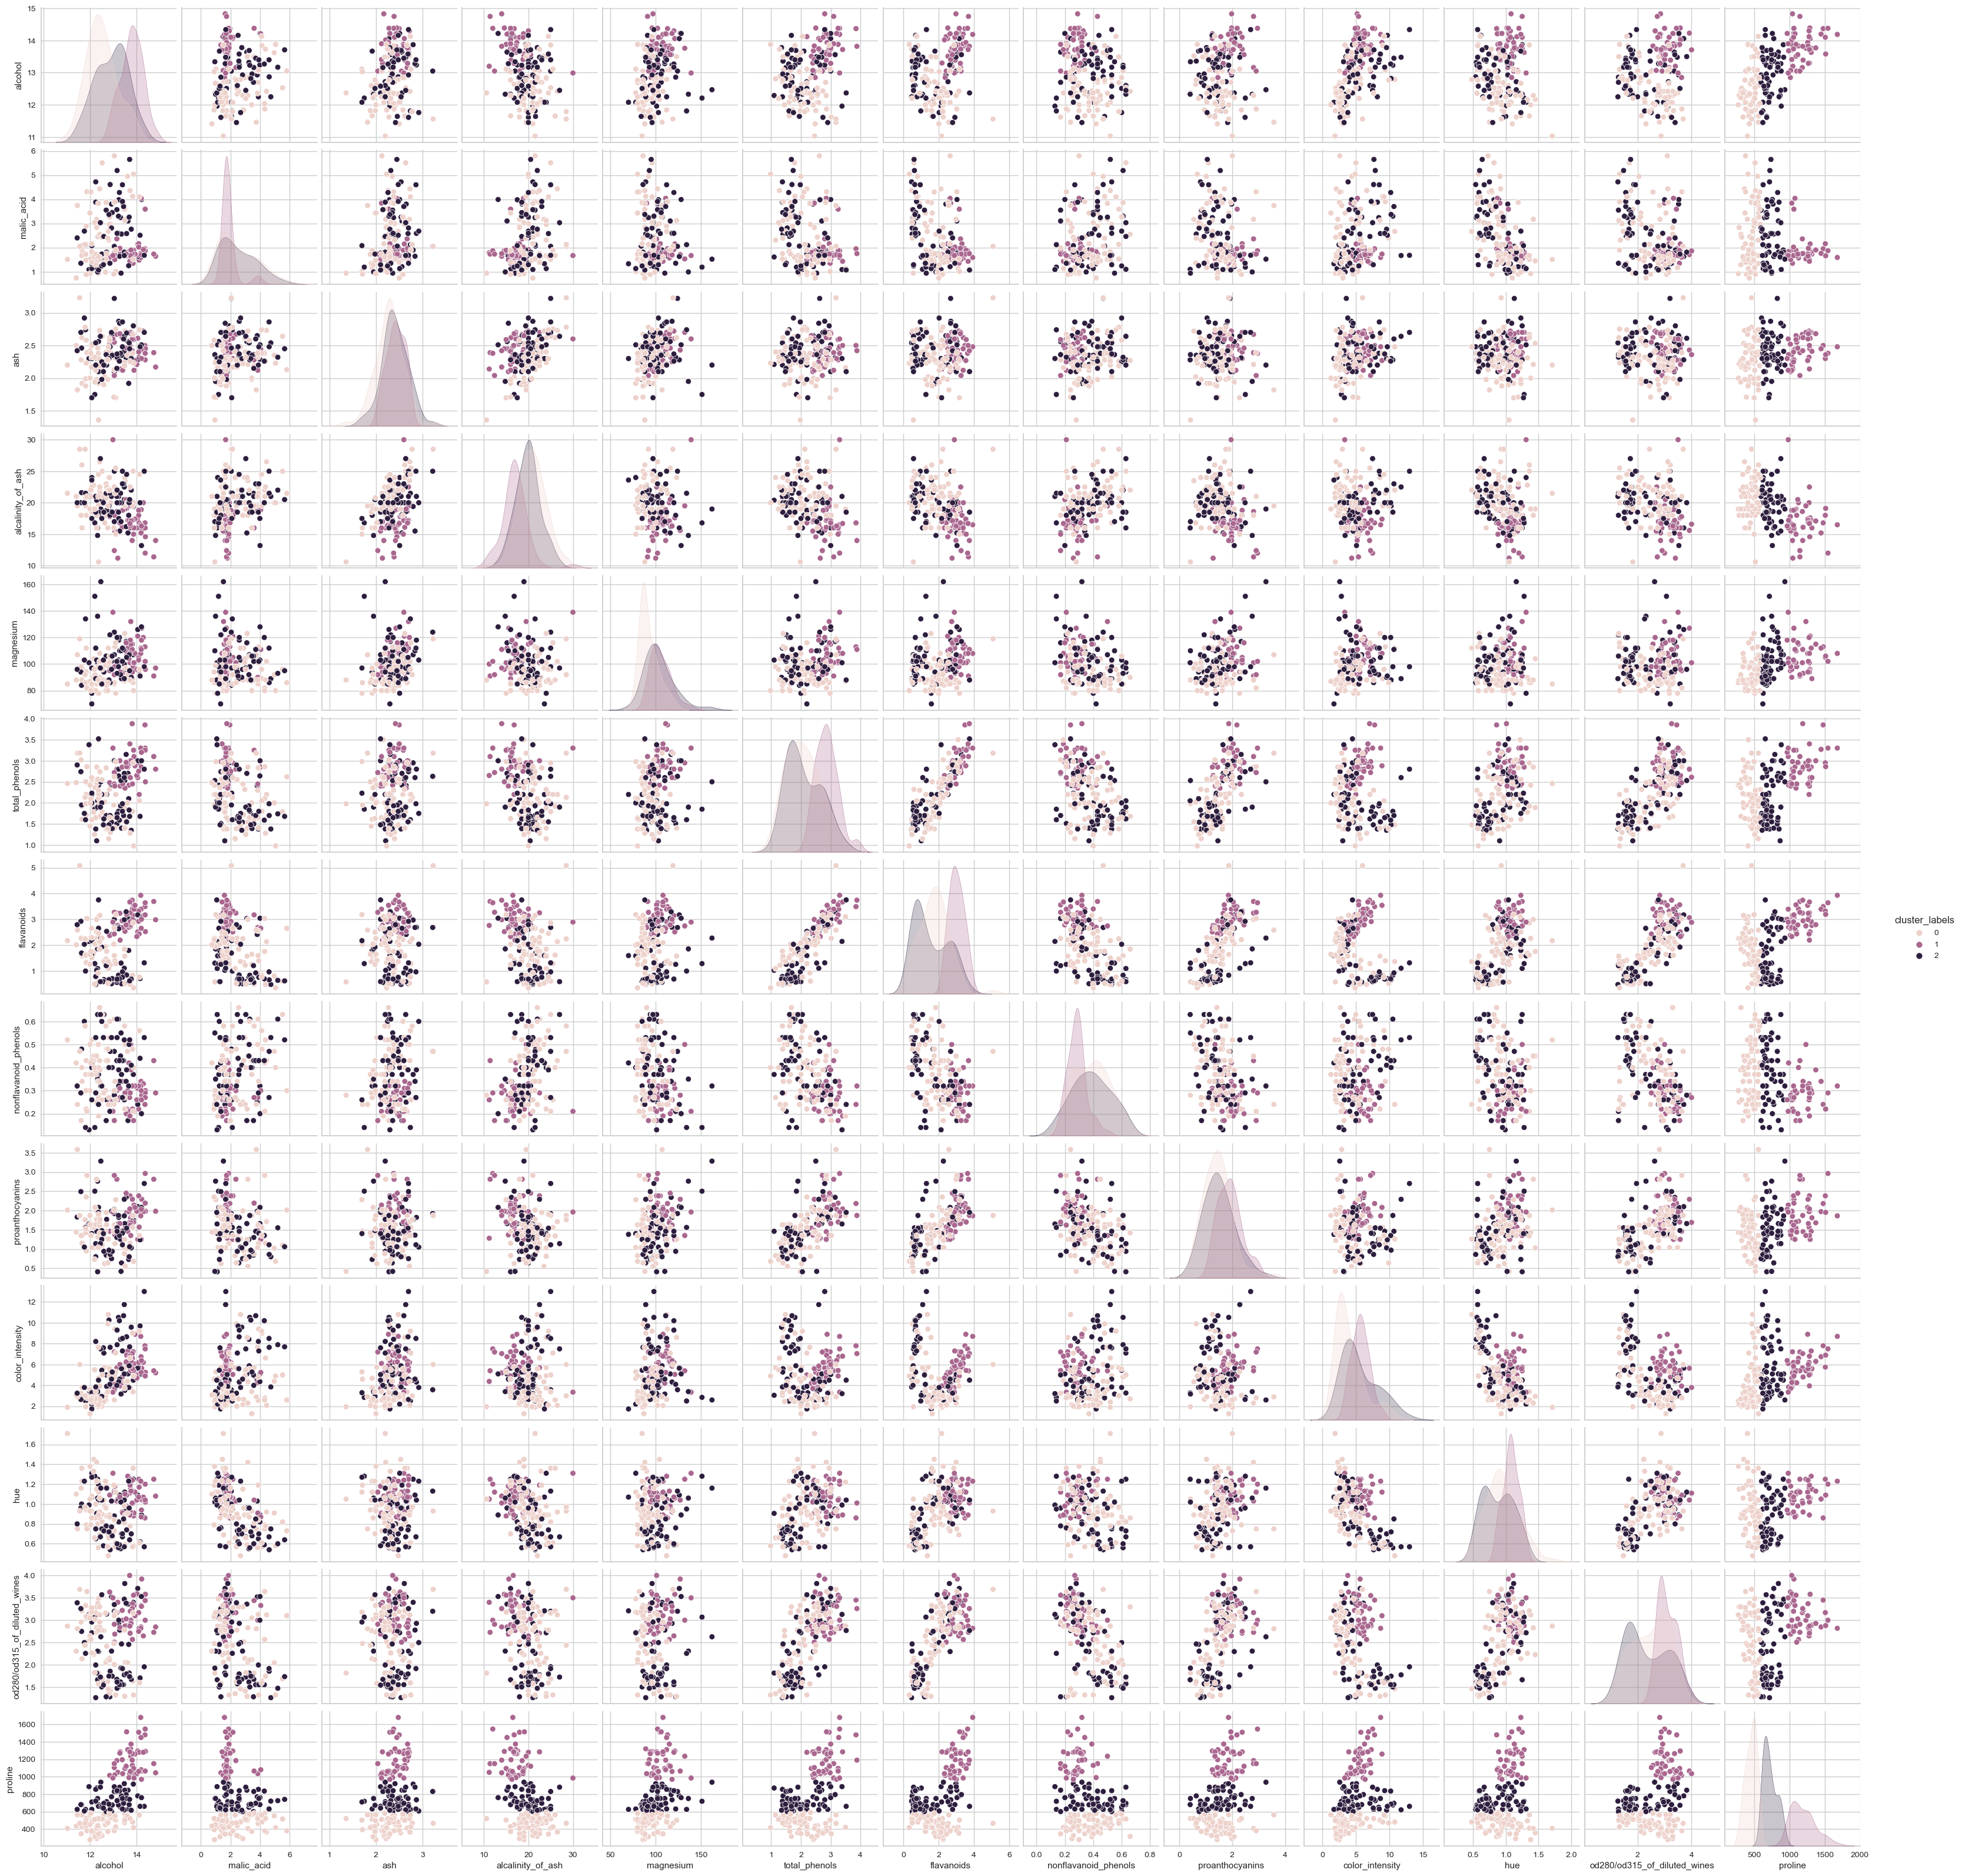

In [11]:
from sklearn.cluster import KMeans
import seaborn as sns


kmeans_model = KMeans(n_clusters=3, random_state=42)

# Entrenar el modelo con los datos X
kmeans_model.fit(X)

# Agregar etiquetas de cluster a nuestro marco de datos X
X['cluster_labels'] = kmeans_model.labels_

# Crear una matriz de dispersión
sns.pairplot(X, hue='cluster_labels')


## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

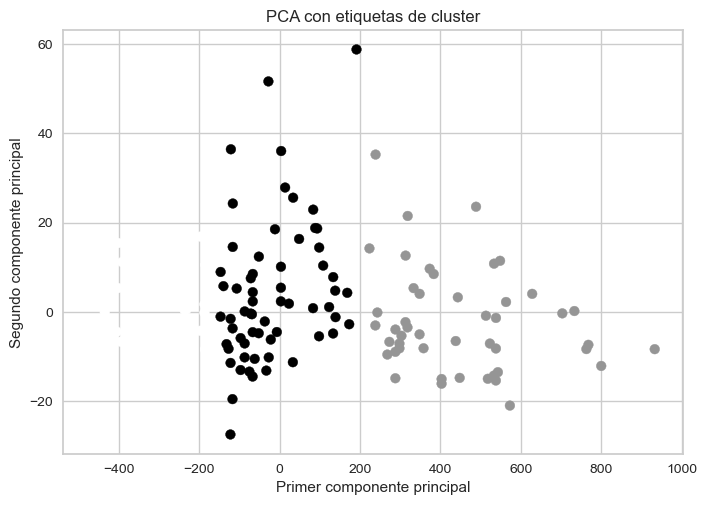

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)


X_pca = pca.fit_transform(X)

# Crear un gráfico de dispersión de los dos primeros componentes principales
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_model.labels_)
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title('PCA con etiquetas de cluster')
plt.show()


## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py

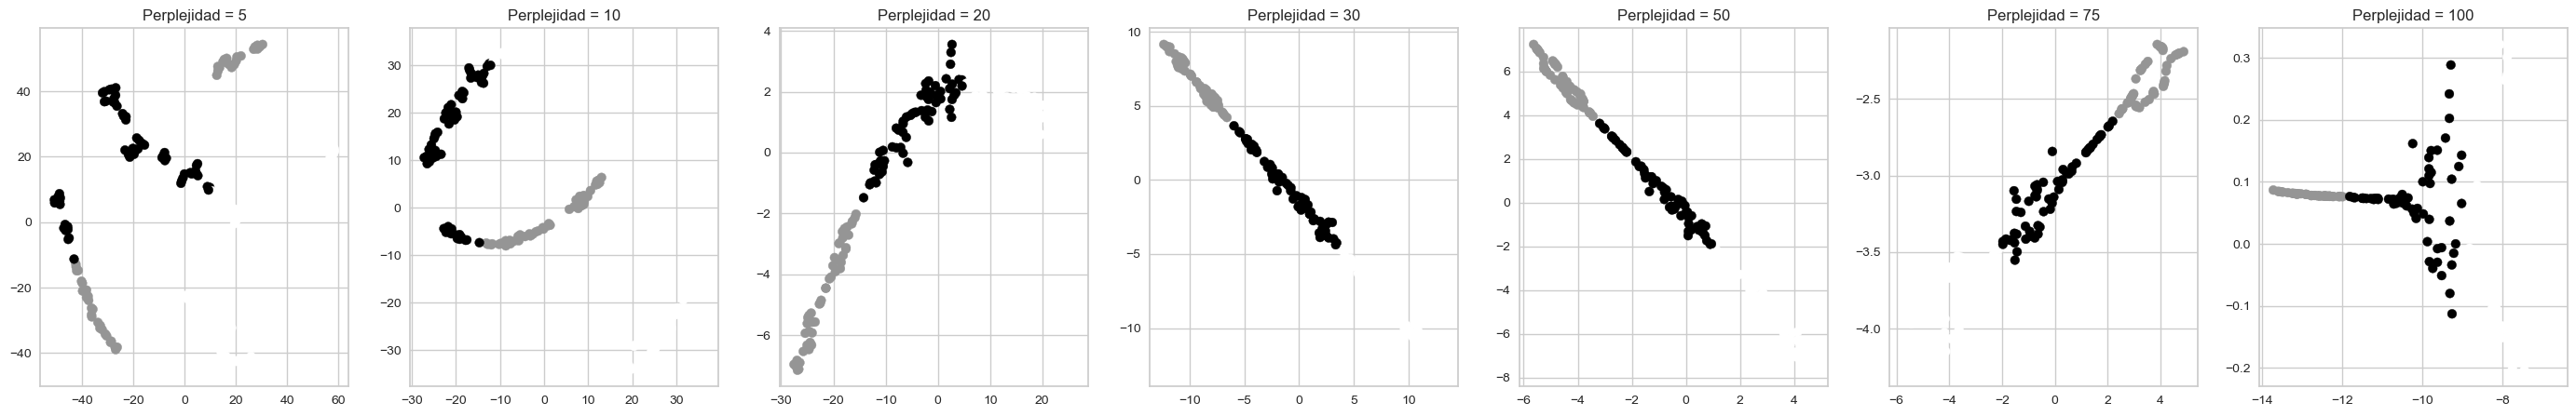

In [13]:
from sklearn.manifold import TSNE


perplexities = [5, 10, 20, 30, 50, 75, 100]

# Crear una figura con múltiples subgráficos
fig, axs = plt.subplots(ncols=len(perplexities), figsize=(len(perplexities)*5, 5))


for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    axs[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_model.labels_)
    axs[i].set_title(f'Perplejidad = {perplexity}')

plt.show()
